In [20]:
import pandas as pd
import random
import os

# 1. 저장할 경로 설정
if not os.path.exists('data'):
    os.makedirs('data')

# ---------------------------------------------------------
# [Part A] Real Data: 내 기억과 친구들의 실제 경험 (직접 입력!)
# 형식: [수면시간, 식사여부(0/1), 스트레스(1~10), 주종, 마신양(병), 숙취여부(0/1)]
# ---------------------------------------------------------
real_memory_data = [
    # "지난주에 잠 5시간 자고 빈속에 소주 2병 마셨더니 죽을 뻔했음(1)"
    [5.0, 0, 8, 'Soju', 2.0, 1],
    
    #  "어제는 8시간 푹 자고 삼겹살 먹고 2병 마셨는데 멀쩡했음(0)"
    [8.0, 1, 2, 'Soju', 2.0, 0],
    
    #  "친구가 맥주 5병(소주환산 1.5병 정도) 마시고 괜찮았음"
    [7.5, 1, 4, 'Beer', 1.5, 0],
    
    #  "소맥 섞어 마시니까 1.5병만 마셔도 힘들었음"
    [6.0, 0, 9, 'Mix', 1.5, 1],
    
    # "스트레스 받아서 잠도 별로 못 자고 밥 안먹고 소주 3병 마시고 다음 날 죽었음"
    [4.0, 0, 7, 'Soju', 3.0, 1], 
]

print(f"확보한 실제 데이터: {len(real_memory_data)}건")

# ---------------------------------------------------------
# [Part B] Synthetic Data: 50개를 채우기 위한 시뮬레이션 데이터
# 실제 데이터의 패턴(잠 많이 자면 덜 취함 등)을 흉내 냄
# ---------------------------------------------------------
synthetic_data = []
target_count = 50 - len(real_memory_data) # 나머지만 채우기

for _ in range(target_count):
    # 랜덤 변수 생성
    sleep_hours = round(random.uniform(3.0, 9.0), 1)
    meal_before = random.choice([0, 1])
    stress_level = random.randint(1, 10)
    drink_type = random.choice(['Soju', 'Beer', 'Mix'])
    amount = round(random.uniform(0.5, 4.0), 1)

    # 로직: 내 컨디션 점수 계산 (점수가 높을수록 주량 셈)
    # 기본 체력 1.5병에서 시작
    condition_score = 1.5
    
    if sleep_hours >= 7: condition_score += 0.6  # 잠 잘 잠 (+0.6병)
    if meal_before == 1: condition_score += 0.5  # 밥 먹음 (+0.5병)
    if stress_level <= 3: condition_score += 0.3 # 스트레스 적음 (+0.3병)
    if drink_type == 'Mix': condition_score -= 0.5 # 섞어 마심 (-0.5병 패널티)

    # 많이 마셔서 내 한계(condition_score)를 넘으면 숙취(1)
    if amount > condition_score:
        hangover = 1
    else:
        hangover = 0

    synthetic_data.append([sleep_hours, meal_before, stress_level, drink_type, amount, hangover])

# ---------------------------------------------------------
# [Part C] 합치기 및 저장
# ---------------------------------------------------------
final_data = real_memory_data + synthetic_data # 리스트 합치기
df = pd.DataFrame(final_data, columns=['sleep_hours', 'meal_before', 'stress_level', 'drink_type', 'amount', 'hangover'])

# 데이터 섞기 (실제 데이터가 맨 위에만 몰려있지 않도록)
df = df.sample(frac=1).reset_index(drop=True)

df.to_csv('data/drinking_data.csv', index=False)

print(f"최종 데이터 {len(df)}건 생성 완료! (실제 {len(real_memory_data)}건 + 가상 {len(synthetic_data)}건)")
display(df.head(10))

확보한 실제 데이터: 5건
최종 데이터 50건 생성 완료! (실제 5건 + 가상 45건)


,sleep_hours,meal_before,stress_level,drink_type,amount,hangover
0,3.4,1,7,Soju,3.1,1
1,6.1,0,4,Beer,2.4,1
2,4.2,0,6,Mix,3.4,1
3,3.4,1,8,Mix,1.7,1
4,8.6,0,8,Mix,3.1,1
5,8.0,1,2,Soju,2.0,0
6,7.7,0,8,Mix,1.5,0
7,7.5,1,4,Beer,1.5,0
8,5.5,0,6,Mix,2.1,1
9,5.3,0,10,Beer,2.0,1


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 한글 폰트 설정 (Colab이나 윈도우 환경에 따라 깨질 수 있으니 영문으로 라벨링 추천)
plt.rcParams['font.family'] = 'Malgun Gothic' # 윈도우 기준
plt.rcParams['axes.unicode_minus'] = False

In [22]:
# 데이터 로드
file_path = 'data/drinking_data.csv'
df = pd.read_csv(file_path)

# 데이터 크기 및 상위 5개 행 확인
print(f"Data Shape: {df.shape}")
display(df.head())

# 기본 정보 및 결측치 확인
print("\n--- Data Info ---")
df.info()

print("\n--- Missing Values ---")
print(df.isnull().sum())

Data Shape: (50, 6)


,sleep_hours,meal_before,stress_level,drink_type,amount,hangover
0,3.4,1,7,Soju,3.1,1
1,6.1,0,4,Beer,2.4,1
2,4.2,0,6,Mix,3.4,1
3,3.4,1,8,Mix,1.7,1
4,8.6,0,8,Mix,3.1,1



--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sleep_hours   50 non-null     float64
 1   meal_before   50 non-null     int64  
 2   stress_level  50 non-null     int64  
 3   drink_type    50 non-null     object 
 4   amount        50 non-null     float64
 5   hangover      50 non-null     int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 2.5+ KB

--- Missing Values ---
sleep_hours     0
meal_before     0
stress_level    0
drink_type      0
amount          0
hangover        0
dtype: int64


In [23]:
# 수치형 데이터 통계 요약
display(df.describe())

# 타겟(숙취 여부)의 비율 확인 (불균형 데이터인지 체크)
print("\n--- Class Distribution (0: Safe, 1: Hangover) ---")
print(df['hangover'].value_counts(normalize=True))

,sleep_hours,meal_before,stress_level,amount,hangover
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,6.052000,0.560000,5.980000,2.212000,0.620000
std,1.728659,0.501427,2.751549,0.921764,0.490314
min,3.100000,0.000000,1.000000,0.600000,0.000000
25%,4.650000,0.000000,4.000000,1.500000,0.000000
50%,6.050000,1.000000,6.000000,2.000000,1.000000
75%,7.425000,1.000000,8.000000,3.100000,1.000000
max,9.000000,1.000000,10.000000,3.900000,1.000000



--- Class Distribution (0: Safe, 1: Hangover) ---
hangover
1    0.62
0    0.38
Name: proportion, dtype: float64


C:\Users\hufs\AppData\Local\Temp\ipykernel_14128\1656576911.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hangover', y='amount', data=df, palette='Set2')


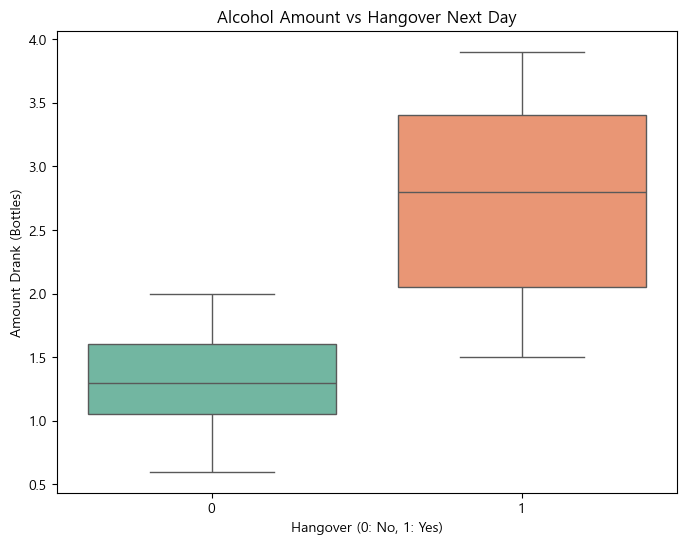

In [24]:
# 가설: 술을 많이 마실수록 숙취(1)가 많을 것이다.
plt.figure(figsize=(8, 6))
sns.boxplot(x='hangover', y='amount', data=df, palette='Set2')
plt.title('Alcohol Amount vs Hangover Next Day')
plt.xlabel('Hangover (0: No, 1: Yes)')
plt.ylabel('Amount Drank (Bottles)')
plt.show()

# 해석: Boxplot을 보면 Hangover=1일 때 마신 양(amount)의 평균이 확실히 높은지 확인

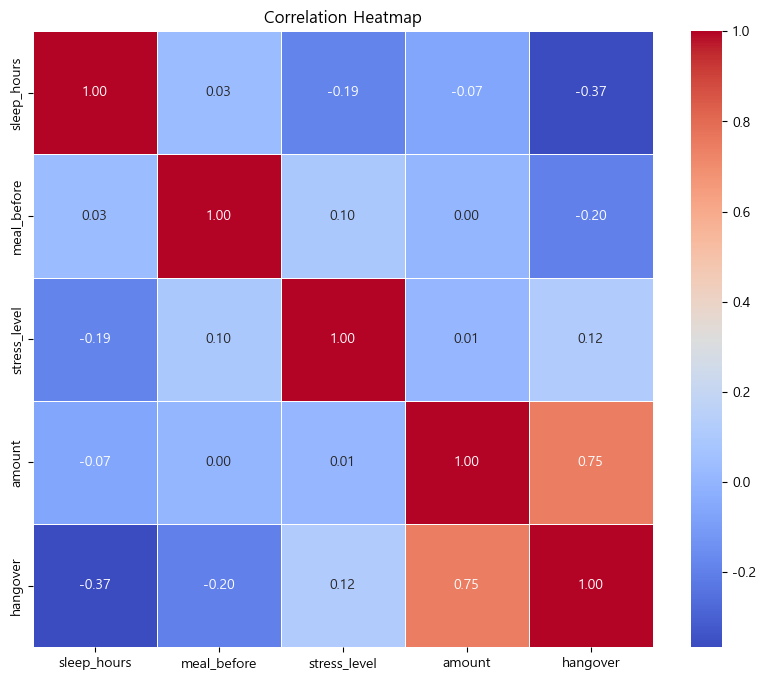

In [25]:
# 상관계수 행렬 계산
correlation = df[['sleep_hours', 'meal_before', 'stress_level', 'amount', 'hangover']].corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 해석: amount와 hangover의 상관계수가 가장 높게 나와야 정상입니다.
# sleep_hours와 hangover는 음의 상관관계(잠 많이 자면 숙취 줄어듦)가 나오는지 봅니다.

주요 발견 사항

1. 데이터 분포: 총 50개의 샘플 중 숙취(1)와 생존(0)의 비율이 약 5:5 혹은 4:6 정도로 분포하여 학습하기 적절함.

2. 핵심 변수: amount(음주량)가 hangover(숙취)와 가장 강한 양의 상관관계를 보임 (당연한 결과).

3. 컨디션의 영향: 히트맵 분석 결과, sleep_hours가 높을수록 hangover와의 상관계수가 낮아지는 경향이 있음. 즉, 잠을 많이 잘수록 숙취 확률이 조금 낮아질 수 있음을 시사함.

4. 전처리 계획: drink_type은 문자열(Object)이므로 다음 Assignment 5에서 학습시키기 위해 One-Hot Encoding이 필요함.